In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
path_dataset = '/content/gdrive/MyDrive/ai-playground/ra-text-classification-spectrogram/datasets/isot-dataset-cleaned-4000.csv'

In [3]:
import pandas as pd

df = pd.read_csv(path_dataset)

In [4]:
df_fake_news = df.loc[df['category'] == 0]
df_fake_news.shape[0]

1289

In [5]:
df_fake_news_list = df_fake_news['text'].tolist()
len(df_fake_news_list)

1289

In [6]:
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 250 kB 14.7 MB/s 
     |████████████████████████████████| 441 kB 64.8 MB/s 
     |████████████████████████████████| 43 kB 2.5 MB/s 
     |████████████████████████████████| 9.2 MB 59.3 MB/s 
     |████████████████████████████████| 1.3 MB 57.8 MB/s 
     |████████████████████████████████| 7.6 MB 22.7 MB/s 
     |████████████████████████████████| 1.9 MB 47.6 MB/s 
     |████████████████████████████████| 5.3 MB 54.8 MB/s 
     |████████████████████████████████| 163 kB 41.2 MB/s 
     |████████████████████████████████| 182 kB 58.7 MB/s 
     |████████████████████████████████| 162 kB 63.1 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 162 kB 50.0 MB/s 
     |████████████████████████████████| 158 kB 78.2 MB/s 
     |████████████████████████████████| 157 kB 71.7 MB/s 
     |█████████████████████████████

In [7]:
from simpletransformers.language_representation import RepresentationModel

model = RepresentationModel(
    model_type='bert',
    model_name='bert-base-uncased',
    use_cuda = False,
)

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTextRepresentation: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForTextRepresentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTextRepresentation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

In [8]:
fake_news_vectors = model.encode_sentences(df_fake_news_list, combine_strategy='mean')

In [ ]:
true_news_image_directory = '/content/gdrive/MyDrive/ai-playground/ra-text-classification-spectrogram/images/isot-4000/fake'

[ 6.63351119e-02 -3.63375172e-02  6.62937582e-01 -2.75586963e-01
  9.56092309e-03 -2.62967534e-02  5.41117430e-01  1.16317540e-01
 -1.37181785e-02 -2.59738207e-01  1.31531373e-01 -3.83102477e-01
 -2.09713340e-01  2.08105534e-01 -2.39474878e-01  2.50194550e-01
  2.93003798e-01 -4.08760691e-03 -2.02143520e-01  4.41376328e-01
  5.59516072e-01  6.83354586e-02  2.03639835e-01  1.02363944e-01
  5.50488949e-01  3.40883285e-02  5.43168411e-02 -1.34756491e-02
 -9.72653627e-02 -1.51155800e-01  5.03036320e-01  1.65576518e-01
 -6.30756170e-02 -9.01785679e-03  2.34649986e-01 -4.42370325e-02
  2.92966887e-02  1.62534386e-01  5.55959232e-02  2.64026225e-01
 -3.42358410e-01 -5.11682272e-01  1.60775542e-01 -8.70363042e-02
 -9.64131057e-02 -4.33989584e-01  9.88268927e-02  1.36047661e-01
  3.23973075e-02 -6.42737150e-02 -1.06506988e-01  4.12810922e-01
 -1.46864310e-01 -2.96124429e-01 -5.12716733e-02  5.86778283e-01
  1.79011181e-01 -4.91544127e-01 -3.55164528e-01 -2.59109527e-01
  1.64543584e-01 -1.75885

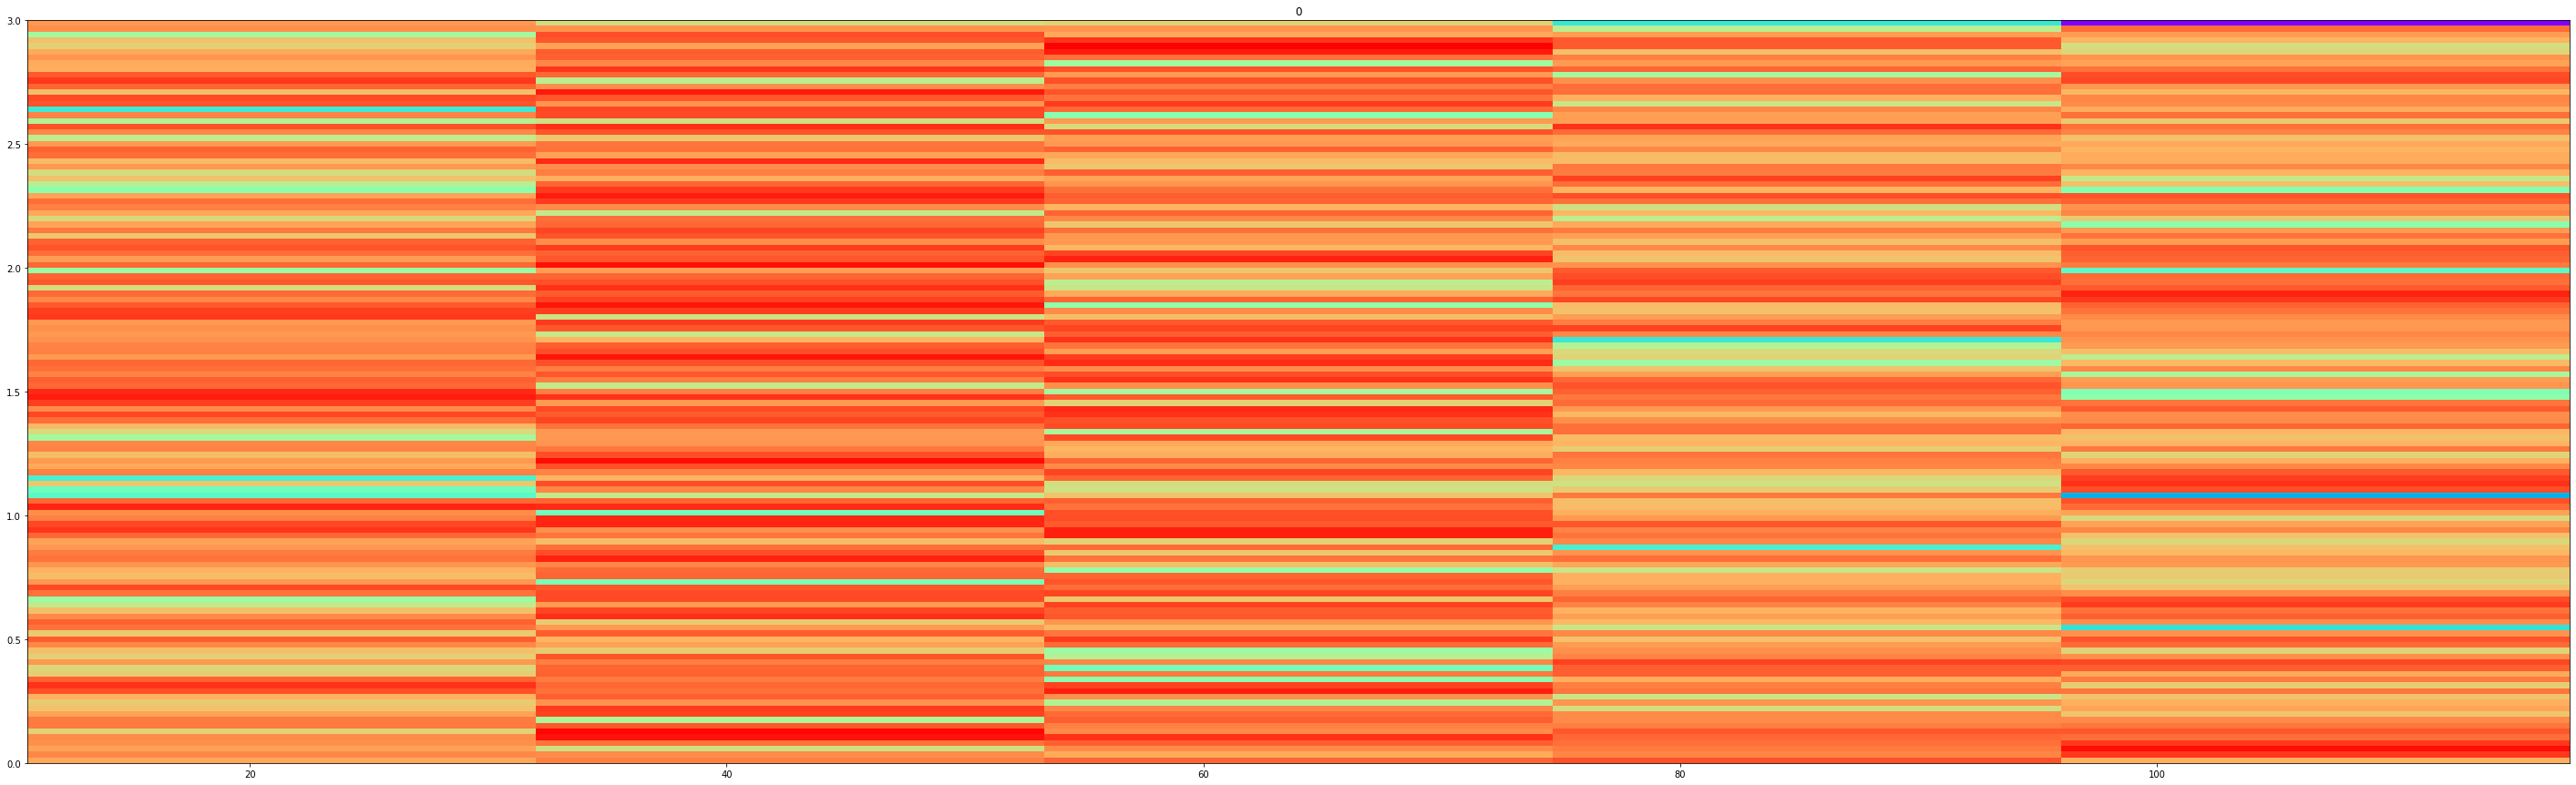

In [11]:
dir = '/content/gdrive/MyDrive/ai-playground/ra-text-classification-spectrogram/images/isot4000bertspectrograms/true'

import matplotlib.pyplot as plt

for i in range(len(fake_news_vectors)):
  # True news spectrograms
  news_vector = fake_news_vectors[i]
  news_title = i

  print(news_vector)

  plt.specgram(news_vector, Fs = 6, cmap = 'rainbow')
  plt.rcParams["figure.figsize"] = (50,15)
  plt.title(news_title)
  plt.savefig(f'{dir}/{news_title}.png')

  break